In [2]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/scripts/Mixture + Analytes/3 Analytes/')

from utils import add_noise, plot_lda_decision_boundary, plot_pca_decision_boundary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re

import warnings
warnings.filterwarnings('ignore')
os.chdir('/home/soham/Desktop/GitHub/BTP/')

## Training model on 3 Analyte data

In [3]:
mixture_lda_data = pd.read_excel('data/mixture/8 solutions/LDA_with_112_121.xlsx')
mixture_pca_data = pd.read_excel('data/mixture/8 solutions/PCA_with_112_121.xlsx')

mixture_lda_data.head()

,LD1,LD2,Labels
0,4.028489,-0.112134,A1
1,4.394760,-0.333785,A1
2,3.983606,-0.493548,A1
3,4.028883,-0.515631,A1
4,4.064155,-0.511202,A1


In [4]:
''' CONSIDER DATA OF ONLY 3 ANALYTES '''

analyte_pca_data = mixture_pca_data[mixture_pca_data['Labels'].isin(['A1','A2','A3'])]
analyte_lda_data = mixture_lda_data[mixture_lda_data['Labels'].isin(['A1','A2','A3'])]

print(len(analyte_pca_data), len(analyte_lda_data))

30 30


In [5]:
train_mapping = {'A1':1,'A2':2,'A3':3}
test_mapping = {'A1':1,'A2':2,'A3':3, 'Mix_111':4,'Mix_101':5,'Mix_121':6,'Mix_211':7,'Mix_112':8}

X_pca_train = analyte_pca_data.drop(['Labels'], axis=1)
Y_pca_train = analyte_pca_data['Labels'].map(train_mapping)
X_pca_test = mixture_pca_data.drop(['Labels'], axis=1)
Y_pca_test = mixture_pca_data['Labels'].map(test_mapping)

X_lda_train = analyte_lda_data.drop(['Labels'], axis=1)
Y_lda_train = analyte_lda_data['Labels'].map(train_mapping)
X_lda_test = mixture_lda_data.drop(['Labels'], axis=1)
Y_lda_test = mixture_lda_data['Labels'].map(test_mapping)

reverse_train_mapping = {1:'A1',2:'A2',3:'A3'}
reverse_test_mapping = {1:'A1',2:'A2',3:'A3', 4:'Mix_111',5:'Mix_101',6:'Mix_121',7:'Mix_211',8:'Mix_112'}

### SVM on PCA

Training accuracy = 1.0


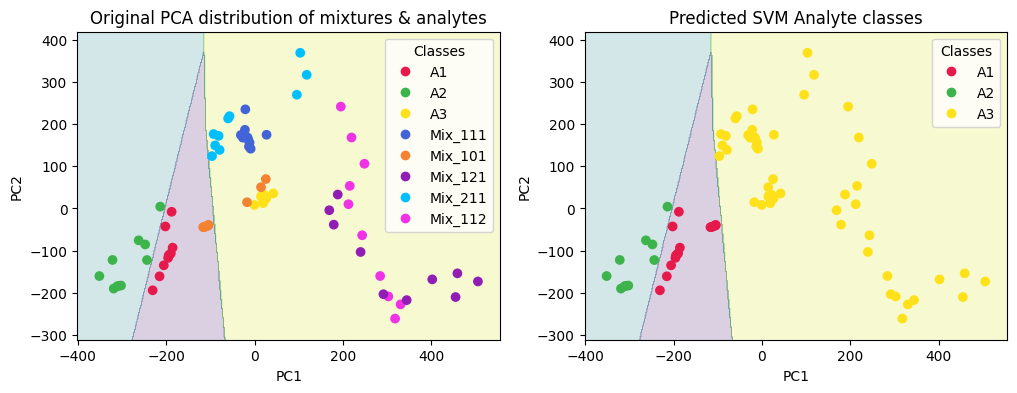

In [ ]:
svm_pca = SVC(kernel='linear')
svm_pca.fit(X_pca_train, Y_pca_train)

print('Training accuracy =', svm_pca.score(X_pca_train, Y_pca_train))

# Predicting on total data

predictions = svm_pca.predict(X_pca_test)
true_labels = Y_pca_test

fig, axs = plt.subplots(1, 2, figsize=(12,4))

x_min, x_max = mixture_pca_data['PC1'].min() - 50, mixture_pca_data['PC1'].max() + 50
y_min, y_max = mixture_pca_data['PC2'].min() - 50, mixture_pca_data['PC2'].max() + 50
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = svm_pca.predict(np.c_[xx.ravel().astype(float), yy.ravel().astype(float)])
Z = Z.reshape(xx.shape)

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 'deepskyblue', '#f032e6']
cmap = plt.cm.colors.ListedColormap(colors)

axs[0].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
scatter0 = axs[0].scatter(X_pca_test['PC1'], X_pca_test['PC2'], c=true_labels, cmap=cmap)
handles, labels = scatter0.legend_elements()
labels = [reverse_test_mapping[int(re.search(r'\d+', label).group())] for label in labels]
axs[0].legend(handles, labels, title="Classes")
axs[0].set_title('Original PCA distribution of mixtures & analytes')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')

colors = ['#e6194b', '#3cb44b', '#ffe119']
cmap = plt.cm.colors.ListedColormap(colors)

axs[1].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
scatter1 = axs[1].scatter(X_pca_test['PC1'], X_pca_test['PC2'], c=predictions, cmap=cmap)
handles, labels = scatter1.legend_elements()
labels = [reverse_train_mapping[int(re.search(r'\d+', label).group())] for label in labels]
axs[1].legend(handles, labels, title="Classes")
axs[1].set_title('Predicted SVM Analyte classes')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')

plt.show()

### SVM on LDA

Training accuracy = 1.0


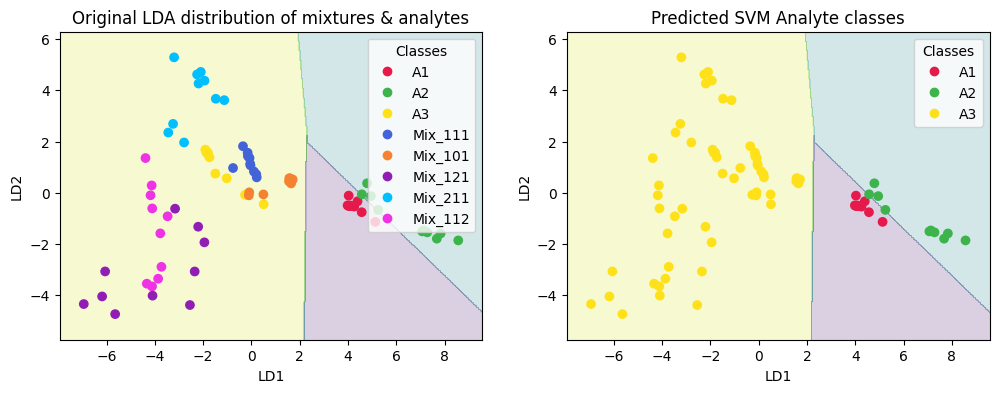

In [19]:
svm_lda = SVC(kernel='linear')
svm_lda.fit(X_lda_train, Y_lda_train)

print('Training accuracy =', svm_lda.score(X_lda_train, Y_lda_train))

# Predicting on total data

predictions = svm_lda.predict(X_lda_test)
true_labels = Y_lda_test

fig, axs = plt.subplots(1, 2, figsize=(12,4))

x_min, x_max = mixture_lda_data['LD1'].min() - 1, mixture_lda_data['LD1'].max() + 1
y_min, y_max = mixture_lda_data['LD2'].min() - 1, mixture_lda_data['LD2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = svm_lda.predict(np.c_[xx.ravel().astype(float), yy.ravel().astype(float)])
Z = Z.reshape(xx.shape)

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 'deepskyblue', '#f032e6']
cmap = plt.cm.colors.ListedColormap(colors)

axs[0].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
scatter0 = axs[0].scatter(X_lda_test['LD1'], X_lda_test['LD2'], c=true_labels, cmap=cmap)
handles, labels = scatter0.legend_elements()
labels = [reverse_test_mapping[int(re.search(r'\d+', label).group())] for label in labels]
axs[0].legend(handles, labels, title="Classes")
axs[0].set_title('Original LDA distribution of mixtures & analytes')
axs[0].set_xlabel('LD1')
axs[0].set_ylabel('LD2')

colors = ['#e6194b', '#3cb44b', '#ffe119']
cmap = plt.cm.colors.ListedColormap(colors)

axs[1].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
scatter1 = axs[1].scatter(X_lda_test['LD1'], X_lda_test['LD2'], c=predictions, cmap=cmap)
handles, labels = scatter1.legend_elements()
labels = [reverse_train_mapping[int(re.search(r'\d+', label).group())] for label in labels]
axs[1].legend(handles, labels, title="Classes")
axs[1].set_title('Predicted SVM Analyte classes')
axs[1].set_xlabel('LD1')
axs[1].set_ylabel('LD2')

plt.show()

### RFC on PCA

Training accuracy = 1.0


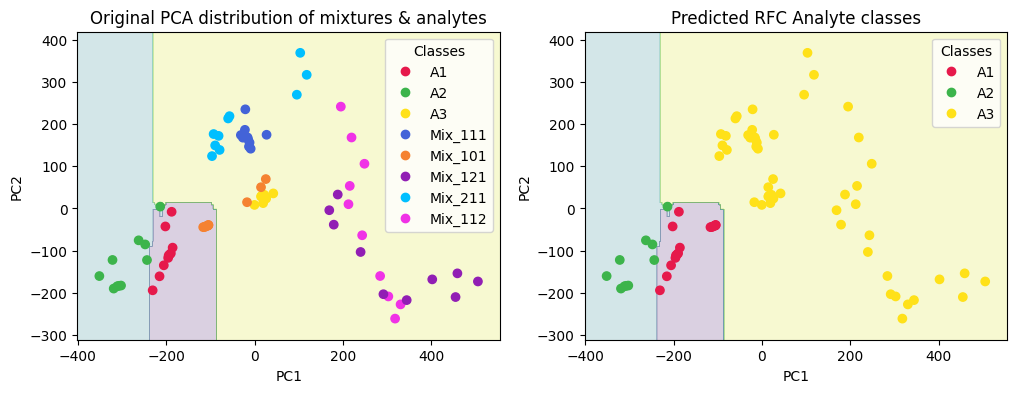

In [20]:
rfc_pca = RFC(n_estimators=100)
rfc_pca.fit(X_pca_train, Y_pca_train)

print('Training accuracy =', rfc_pca.score(X_pca_train, Y_pca_train))

# Predicting on total data

predictions = rfc_pca.predict(X_pca_test)
true_labels = Y_pca_test

fig, axs = plt.subplots(1, 2, figsize=(12,4))

x_min, x_max = mixture_pca_data['PC1'].min() - 50, mixture_pca_data['PC1'].max() + 50
y_min, y_max = mixture_pca_data['PC2'].min() - 50, mixture_pca_data['PC2'].max() + 50
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = rfc_pca.predict(np.c_[xx.ravel().astype(float), yy.ravel().astype(float)])
Z = Z.reshape(xx.shape)

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 'deepskyblue', '#f032e6']
cmap = plt.cm.colors.ListedColormap(colors)

axs[0].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
scatter0 = axs[0].scatter(X_pca_test['PC1'], X_pca_test['PC2'], c=true_labels, cmap=cmap)
handles, labels = scatter0.legend_elements()
labels = [reverse_test_mapping[int(re.search(r'\d+', label).group())] for label in labels]
axs[0].legend(handles, labels, title="Classes")
axs[0].set_title('Original PCA distribution of mixtures & analytes')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')

colors = ['#e6194b', '#3cb44b', '#ffe119']
cmap = plt.cm.colors.ListedColormap(colors)

axs[1].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
scatter1 = axs[1].scatter(X_pca_test['PC1'], X_pca_test['PC2'], c=predictions, cmap=cmap)
handles, labels = scatter1.legend_elements()
labels = [reverse_train_mapping[int(re.search(r'\d+', label).group())] for label in labels]
axs[1].legend(handles, labels, title="Classes")
axs[1].set_title('Predicted RFC Analyte classes')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')

plt.show()

### RFC on LDA

Training accuracy = 1.0


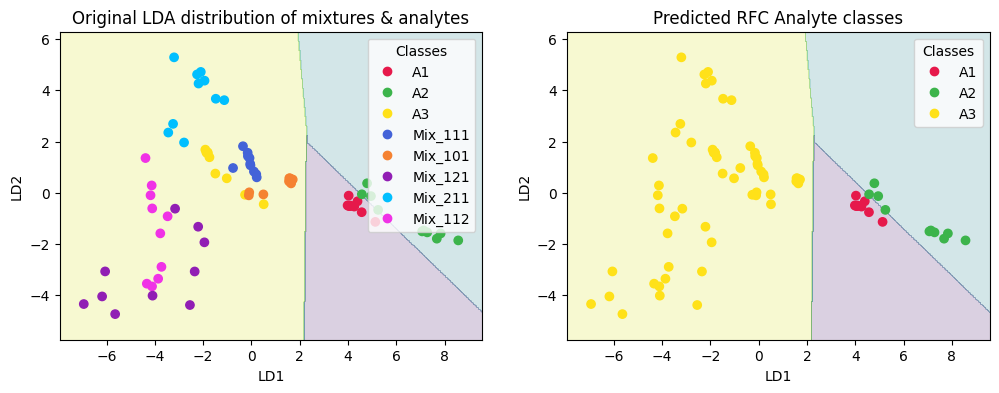

In [21]:
rfc_lda = SVC(kernel='linear')
rfc_lda.fit(X_lda_train, Y_lda_train)

print('Training accuracy =', rfc_lda.score(X_lda_train, Y_lda_train))

# Predicting on total data

predictions = rfc_lda.predict(X_lda_test)
true_labels = Y_lda_test

fig, axs = plt.subplots(1, 2, figsize=(12,4))

x_min, x_max = mixture_lda_data['LD1'].min() - 1, mixture_lda_data['LD1'].max() + 1
y_min, y_max = mixture_lda_data['LD2'].min() - 1, mixture_lda_data['LD2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = rfc_lda.predict(np.c_[xx.ravel().astype(float), yy.ravel().astype(float)])
Z = Z.reshape(xx.shape)

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 'deepskyblue', '#f032e6']
cmap = plt.cm.colors.ListedColormap(colors)

axs[0].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
scatter0 = axs[0].scatter(X_lda_test['LD1'], X_lda_test['LD2'], c=true_labels, cmap=cmap)
handles, labels = scatter0.legend_elements()
labels = [reverse_test_mapping[int(re.search(r'\d+', label).group())] for label in labels]
axs[0].legend(handles, labels, title="Classes")
axs[0].set_title('Original LDA distribution of mixtures & analytes')
axs[0].set_xlabel('LD1')
axs[0].set_ylabel('LD2')

colors = ['#e6194b', '#3cb44b', '#ffe119']
cmap = plt.cm.colors.ListedColormap(colors)

axs[1].contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
scatter1 = axs[1].scatter(X_lda_test['LD1'], X_lda_test['LD2'], c=predictions, cmap=cmap)
handles, labels = scatter1.legend_elements()
labels = [reverse_train_mapping[int(re.search(r'\d+', label).group())] for label in labels]
axs[1].legend(handles, labels, title="Classes")
axs[1].set_title('Predicted RFC Analyte classes')
axs[1].set_xlabel('LD1')
axs[1].set_ylabel('LD2')

plt.show()